Welcome!

In [1]:
%pip install -r requirements.txt
#pip installs a list of libraries
#list can be found in requirements.txt

#important import names
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import statements til I figure out the other way 
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
nltk.download('punkt_tab')
nltk.download('tagsets')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import random

import pandas as pd

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

import json

import csv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from xgboost import XGBClassifier

from tabulate import tabulate

import requests


[nltk_data] Downloading package punkt_tab to /home/helen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package tagsets to /home/helen/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /home/helen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/helen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/helen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#import sys
#sys.path.append('.')
#from importables import *
#grabs all imports from import.py

#This is not working but it should be >>>:(


In [4]:

# Load a text file from Project Gutenberg
url = "https://www.gutenberg.org/files/1342/1342-0.txt"  # Example: Pride and Prejudice by Jane Austen
response = requests.get(url)
text = response.text



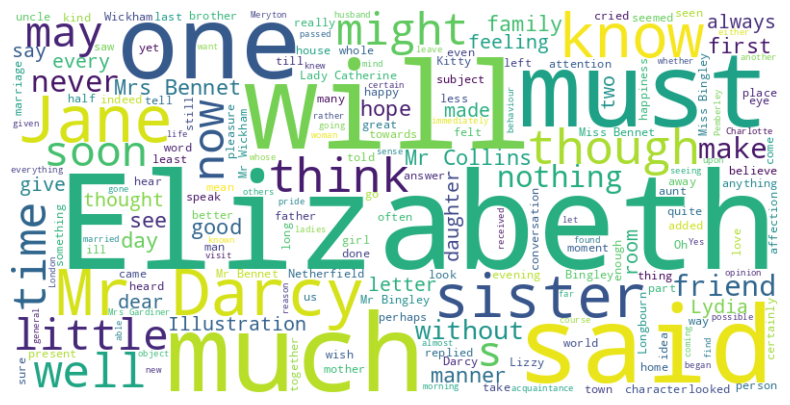

In [5]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
df_elife_train = pd.read_parquet('data/Elife/train-00000-of-00001.parquet')
df_elife_test = pd.read_parquet('data/Elife/test-00000-of-00001.parquet')
df_elife_validation = pd.read_parquet('data/Elife/validation-00000-of-00001.parquet')
df_elife_validation.head(5)

,article,summary,section_headings,keywords,year,title
0,Cell-fate reprograming is at the heart of deve...,The DNA in genes encodes the basic information...,"[Abstract, Introduction, Results, Discussion, ...","[developmental, biology]",2016,Increasing Notch signaling antagonizes PRC2-me...
1,"Klebsiella pneumoniae is a respiratory , blood...",Klebsiella pneumoniae is a type of bacteria th...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology, and, infectious, disease, immun...",2020,SKAP2 is required for defense against K. pneum...
2,Plasmodium vivax relapse infections occur foll...,Malaria is one of the world's most deadly infe...,"[Abstract, Introduction, Results, Discussion, ...","[epidemiology, and, global, health]",2014,Modelling the contribution of the hypnozoite r...
3,When 2 Mha of Amazonian forests are disturbed ...,The Amazon rainforest in South America is the ...,"[Abstract, Introduction, Results, Discussion, ...",[ecology],2016,Carbon recovery dynamics following disturbance...
4,Neurosphere formation is commonly used as a su...,Neurons that arise in the adult nervous system...,"[Abstract, Introduction, Results, Discussion, ...","[stem, cells, and, regenerative, medicine]",2014,Prospective identification of functionally dis...


In [7]:
df_plos_train_1 = pd.read_parquet('data/PLOS/train-00000-of-00003.parquet')
df_plos_train_2 = pd.read_parquet('data/PLOS/train-00001-of-00003.parquet')
df_plos_train_3 = pd.read_parquet('data/PLOS/train-00002-of-00003.parquet')
df_plos_test = pd.read_parquet('data/PLOS/test-00000-of-00001.parquet')
df_plos_validation = pd.read_parquet('data/PLOS/validation-00000-of-00001.parquet')
df_plos_train_3.head(5)


,article,summary,section_headings,keywords,year,title
0,Cellular heterogeneity hinders the extraction ...,The mammalian inner ear is a highly complex se...,"[Abstract, Introduction, Results, Discussion, ...","[genetics, of, disease, genome, expression, an...",2011,Cell Type–Specific Transcriptome Analysis Reve...
1,MBT domain proteins are involved in developmen...,Post-translational modifications ( PTM ) of hi...,"[Abstract, Introduction, Results, Discussion, ...","[genetic, mutation, protein, interactions, his...",2011,H3K9me2/3 Binding of the MBT Domain Protein LI...
2,Melioidosis is a problem in the developing tro...,Melioidosis is a problem in the developing tro...,"[Abstract, Introduction, Materials, and, Metho...","[public, and, occupational, health, infectious...",2014,Sulphonylurea Usage in Melioidosis Is Associat...
3,The recent origin and great evolutionary poten...,The AIDS epidemic claims more lives per year t...,"[Abstract, Introduction, Results, Discussion, ...","[public, health, and, epidemiology/infectious,...",2009,Increasing Clinical Virulence in Two Decades o...
4,Invariant representations of stimulus features...,"When we physically interact with an object , o...","[Abstract, Introduction, Results/Discussion, M...","[physiology/sensory, systems, neuroscience/sen...",2010,Shape Invariant Coding of Motion Direction in ...


In [8]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
def data_cleaner(doc):
    """A function to strip punctuation, strip stopwords, casefold, lemmatize,
    And part of speech tag words for clean data for modeling"""
    
    sw = stopwords.words('english')
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    #print(doc)
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    #print(doc)
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    #print(' '.join(doc))
    return ' '.join(doc)

In [10]:
#listifies contents in articl column
articles_list = df_elife_train.article.tolist()
print(len(articles_list))

4346


In [11]:
print(articles_list[0])

In temperate climates , winter deaths exceed summer ones . However , there is limited information on the timing and the relative magnitudes of maximum and minimum mortality , by local climate , age group , sex and medical cause of death . We used geo-coded mortality data and wavelets to analyse the seasonality of mortality by age group and sex from 1980 to 2016 in the USA and its subnational climatic regions . Death rates in men and women ≥ 45 years peaked in December to February and were lowest in June to August , driven by cardiorespiratory diseases and injuries . In these ages , percent difference in death rates between peak and minimum months did not vary across climate regions , nor changed from 1980 to 2016 . Under five years , seasonality of all-cause mortality largely disappeared after the 1990s . In adolescents and young adults , especially in males , death rates peaked in June/July and were lowest in December/January , driven by injury deaths .
It is well-established that dea

In [12]:
#tokenize all words in all articles
article_tokens = []
for i in articles_list:
    article_tokens.append(word_tokenize(i))
print(article_tokens[0])

['In', 'temperate', 'climates', ',', 'winter', 'deaths', 'exceed', 'summer', 'ones', '.', 'However', ',', 'there', 'is', 'limited', 'information', 'on', 'the', 'timing', 'and', 'the', 'relative', 'magnitudes', 'of', 'maximum', 'and', 'minimum', 'mortality', ',', 'by', 'local', 'climate', ',', 'age', 'group', ',', 'sex', 'and', 'medical', 'cause', 'of', 'death', '.', 'We', 'used', 'geo-coded', 'mortality', 'data', 'and', 'wavelets', 'to', 'analyse', 'the', 'seasonality', 'of', 'mortality', 'by', 'age', 'group', 'and', 'sex', 'from', '1980', 'to', '2016', 'in', 'the', 'USA', 'and', 'its', 'subnational', 'climatic', 'regions', '.', 'Death', 'rates', 'in', 'men', 'and', 'women', '≥', '45', 'years', 'peaked', 'in', 'December', 'to', 'February', 'and', 'were', 'lowest', 'in', 'June', 'to', 'August', ',', 'driven', 'by', 'cardiorespiratory', 'diseases', 'and', 'injuries', '.', 'In', 'these', 'ages', ',', 'percent', 'difference', 'in', 'death', 'rates', 'between', 'peak', 'and', 'minimum', 'mo

In [13]:
#tokenizes raw article data into single list of tokens, not broken into sentences
article_tokens_flat = [word for doc in article_tokens for word in doc]

print(article_tokens_flat[0])

In


In [14]:
#collect raw tokens
all_words_raw = []

for w in article_tokens_flat :
    all_words_raw.append(w)
    
print(len(all_words_raw))

45321232


In [15]:
#gets count of tokens and types
tokens = all_words_raw
types = set(tokens)
len(types), len(tokens)

(717066, 45321232)

In [16]:
fdist1 = nltk.FreqDist(tokens)
fdist1
#create frequency distribution, checks all tokens and how often they occur in the vocab
#prints out top 10 most used, these are usally stopwrods as the data has not been cleaned

FreqDist({'.': 2599695, ',': 2231581, 'the': 1630826, ')': 1309277, '(': 1307699, 'of': 1208012, 'and': 1052708, 'in': 821512, 'to': 619133, 'a': 471538, ...})

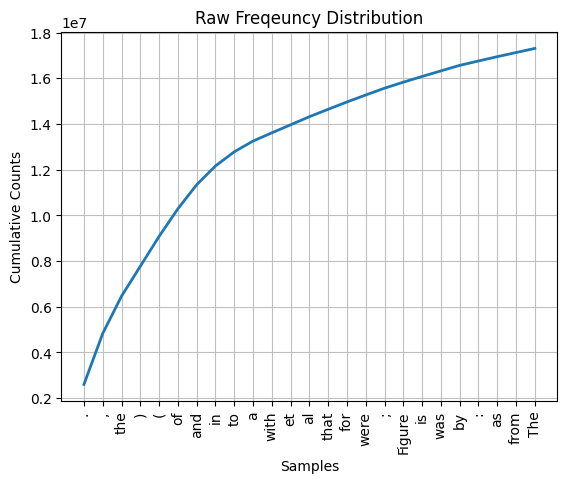

In [17]:
fdist1.plot(25, title = 'Raw Freqeuncy Distribution', cumulative = True);

In [18]:
fdist1.hapaxes()[:10]
#first ten unique words

['geo-coded',
 'June/July',
 'December/January',
 'Medina-Ramón',
 'Bobb',
 'winter-summer',
 'MacDorman',
 'Lerchl',
 'always-connected',
 '15-24']

In [19]:
elife_doc_lengths = []

for doc in articles_list:
    elife_doc_lengths.append(len(doc))

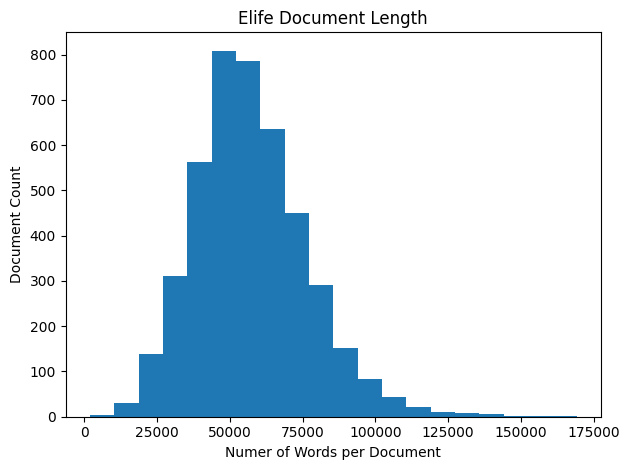

In [20]:
n_bins = 20
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(elife_doc_lengths, bins=n_bins)
axs.set_title("Elife Document Length");
axs.set_xlabel('Numer of Words per Document');
axs.set_ylabel("Document Count");

In [24]:
#run data through data cleaning function

clean_corpus = []
for doc in articles_list:
    clean_corpus.append(data_cleaner(doc))
print("done")

NameError: name 'wordnet' is not defined

In [ ]:
df_elife_train['clean'] = clean_corpus

df_elife_train.head()

In [ ]:
def wordcloud_maker(df, stopwords = None):
    """cretes words clouds from cleaned data"""
    all_clean = " ".join(review for review in df.clean)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(all_clean)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
wordcloud_maker(df_elife_train)

In [ ]:
#These results are extremely funny. We might want to create a custom stopwords 
#list to remove things like et al, figure, doi, dx, org, elife etc